In [35]:
# Import necessary modules
import geopandas as gpd
import matplotlib as plt
import matplotlib.pyplot as plt
import geoplot
import numpy as np
import pandas as pd
import contextily as ctx

In [36]:
#Plot 
# Set filepath 
fp = "./data/Collisions/Collisions.shp"

# Read file using gpd.read_file()
cl = gpd.read_file(fp)

#Read file using gpd.read_file()
fp2 = "./data/Seattle_Streets/Seattle_Streets.shp"
street = gpd.read_file(fp2)


In [4]:
# filter out highway, 0 is non-artisial 
strt = street.loc[street['ARTCLASS'] < 4,].reset_index(drop = True).copy()

## remove road underconstruction or planned
strt2 = strt.loc[(strt['STATUS'] != 'UNDERCONS') & (strt['STATUS'] != 'PLANNED'),:].reset_index(drop = True).copy()


# filter our bike collision
bikecl_ = cl.loc[cl['PEDCYLCOUN'] >=1,]
bikecl = bikecl_.reset_index(drop = True).copy()
len(bikecl)

5707

In [20]:
bikeclmap = bikecl.loc[bikecl.iloc[:,-1].notnull(),:]

In [21]:
len(bikeclmap)

5667

In [25]:
bikeclmap = bikeclmap.to_crs(epsg=3857)

In [37]:

bikeclmap.crs

{'init': 'epsg:3857', 'no_defs': True}

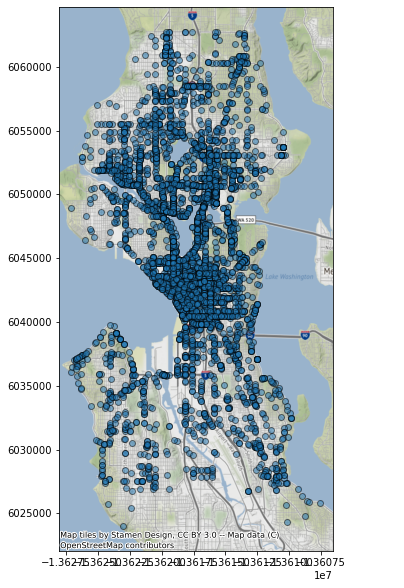

In [38]:
ax = bikeclmap.plot(figsize=(20, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

In [39]:
from scipy import ndimage
def heatmap(d, bins=(100,100), smoothing=1.3, cmap='jet'):
    def getx(pt):
        return pt.coords[0][0]

    def gety(pt):
        return pt.coords[0][1]

    x = list(d.geometry.apply(getx))
    y = list(d.geometry.apply(gety))
    heatmap, xedges, yedges = np.histogram2d(y, x, bins=bins)
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]

    logheatmap = np.log(heatmap)
    logheatmap[np.isneginf(logheatmap)] = 0
    logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest')
    
    plt.imshow(logheatmap, cmap=cmap, extent=extent)
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.show()

//anaconda3/envs/bike/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


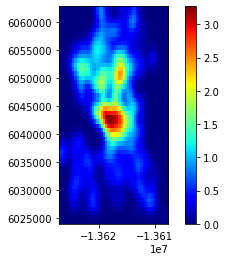

In [40]:
heatmap(bikeclmap, bins=50, smoothing=1.5)